In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.api import VAR, DynamicVAR
from scipy import stats
import seaborn as sns

/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# 1. Google SV (US)

In [2]:
google_queries = pd.DataFrame.from_csv("Google Trends Relative Search Volume.csv")

## 1.1 Non-transformed data

### A) Stationarity

In [3]:
google_queries_series = pd.Series(data=google_queries["Relative Search Volume"])
google_queries_series.head()

0    6
1    3
2    3
3    2
4    3
Name: Relative Search Volume, dtype: int64

ADF:

In [4]:
A = google_queries_series.values
result = adfuller(A)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.792861
p-value: 0.059301
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


KPSS:

In [5]:
result = kpss(A)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.557578
p-value: 0.028699
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


### B) Distribution

Skewness:

In [6]:
stats.skew(google_queries_series)

4.71207871473664

Kurtosis:

In [7]:
stats.kurtosis(google_queries_series)

25.908848291421485

Mean:

In [8]:
np.mean(google_queries_series)

6.704980842911877

Histogram:

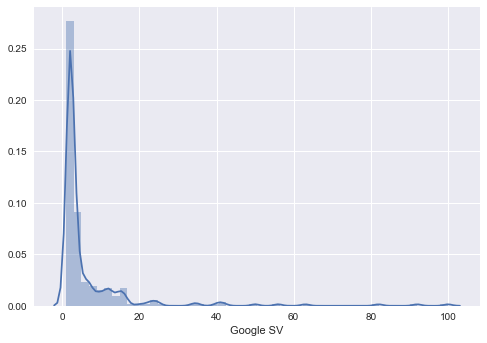

In [9]:
sns.distplot(google_queries_series)
plt.xlabel('Google SV')
plt.show()

## 1.2 Log-Transformation

In [10]:
google_queries_series_log = google_queries_series.apply(np.log)

### A) Stationarity

ADF:

In [11]:
B = google_queries_series_log.values
result = adfuller(B)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.639274
p-value: 0.462640
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


KPSS:

In [12]:
result = kpss(B)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.691631
p-value: 0.014306
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


### B) Distribution

Skewness:

In [13]:
stats.skew(google_queries_series_log)

1.4025929362204257

Kurtosis:

In [14]:
stats.kurtosis(google_queries_series_log)

1.4826032963609892

Mean:

In [15]:
np.mean(google_queries_series_log)

1.266821404760844

Histogram:

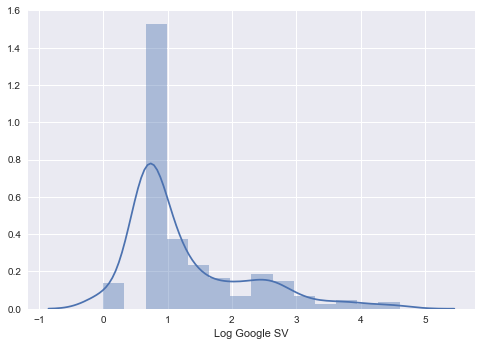

In [16]:
sns.distplot(google_queries_series_log)
plt.xlabel('Log Google SV')
plt.show()

## 1.3 First Differences

In [17]:
google_queries_series_diff = google_queries_series.diff()
google_queries_series_diff = google_queries_series_diff.drop(0)

### A) Stationarity

ADF:

In [18]:
C = google_queries_series_diff.values
result = adfuller(C)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.017531
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


KPSS:

In [19]:
result = kpss(C)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.042005
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [20]:
stats.skew(google_queries_series_diff)

-0.2822889741702608

Kurtosis:

In [21]:
stats.kurtosis(google_queries_series_diff)

43.93940891671968

Mean:

In [22]:
np.mean(google_queries_series_diff)

0.026923076923076925

Histogram:

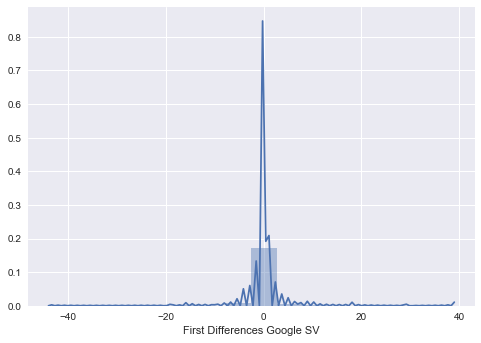

In [23]:
sns.distplot(google_queries_series_diff)
plt.xlabel('First Differences Google SV')
plt.show()

## 1.4 First Log Differences

In [24]:
google_queries_series_diff_log = google_queries_series_log.diff()
google_queries_series_diff_log = google_queries_series_diff_log.drop(0)

### A) Stationarity

ADF:

In [25]:
D = google_queries_series_diff_log.values
result = adfuller(D)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.034441
p-value: 0.000000
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


KPSS:

In [26]:
result = kpss(D)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.129324
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [27]:
stats.skew(google_queries_series_diff_log)

0.7147336995357206

Kurtosis:

In [28]:
stats.kurtosis(google_queries_series_diff_log)

3.4898732636767056

Mean:

In [29]:
np.mean(google_queries_series_diff_log)

0.0029738072624364686

Histogram:

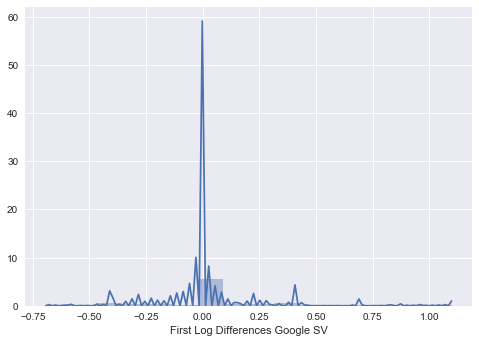

In [30]:
sns.distplot(google_queries_series_diff_log)
plt.xlabel('First Log Differences Google SV')
plt.show()

# 2. Wikipedia PV

In [31]:
wikipedia_pageviews = pd.DataFrame.from_csv("Wikipedia Pageview Data.csv")
wikipedia_pageviews_series = pd.Series(data=wikipedia_pageviews["Pageviews"])
wikipedia_pageviews_series.head()

0    12957
1     9802
2     8307
3     8947
4     8692
Name: Pageviews, dtype: int64

## 2.1 Non-transfomed data

### A) Stationarity

ADF:

In [32]:
E = wikipedia_pageviews_series.values
result = adfuller(E)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.536680
p-value: 0.007094
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


KPSS:

In [33]:
result = kpss(E)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 1.645582
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [34]:
stats.skew(wikipedia_pageviews_series)

4.636621306253488

Kurtosis:

In [35]:
stats.kurtosis(wikipedia_pageviews_series)

29.14944655640315

Mean:

In [36]:
np.mean(wikipedia_pageviews_series)

23853.21982335623

Histogram:

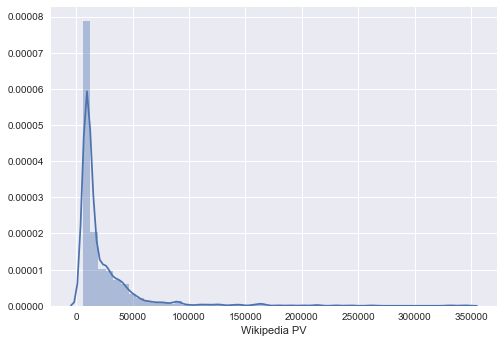

In [37]:
sns.distplot(wikipedia_pageviews_series)
plt.xlabel('Wikipedia PV')
plt.show()

## 2.2 Logarithmic Transformation

In [38]:
wikipedia_pageviews_series_log = wikipedia_pageviews_series.apply(np.log)

### A) Stationarity

ADF:

In [39]:
F = wikipedia_pageviews_series_log.values
result = adfuller(F)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.807729
p-value: 0.376631
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


KPSS:

In [40]:
result = kpss(F)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 3.238990
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [41]:
stats.skew(wikipedia_pageviews_series_log)

1.153037734603932

Kurtosis:

In [42]:
stats.kurtosis(wikipedia_pageviews_series_log)

0.854441671417526

Mean:

In [43]:
np.mean(wikipedia_pageviews_series_log)

9.673801273002901

Histogram:

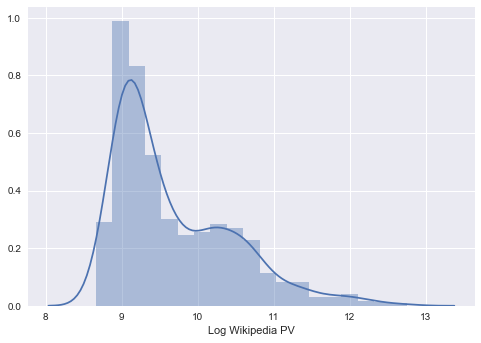

In [44]:
sns.distplot(wikipedia_pageviews_series_log)
plt.xlabel('Log Wikipedia PV')
plt.show()

## 2.3 First Differences

In [45]:
wikipedia_pageviews_series_diff = wikipedia_pageviews_series.diff()
wikipedia_pageviews_series_diff = wikipedia_pageviews_series_diff.drop(0)

### A) Stationarity

ADF:

In [46]:
G = wikipedia_pageviews_series_diff.values
result = adfuller(G)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.080099
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


KPSS:

In [47]:
result = kpss(G)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.027722
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [48]:
stats.skew(wikipedia_pageviews_series_diff)

2.4905936963241277

Kurtosis:

In [49]:
stats.kurtosis(wikipedia_pageviews_series_diff)

72.05892846631957

Mean:

In [50]:
np.mean(wikipedia_pageviews_series_diff)

-0.8379174852652259

Histogram:

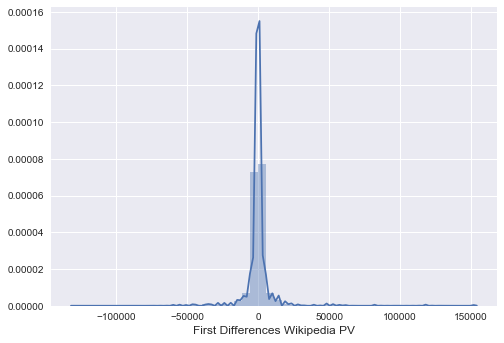

In [51]:
sns.distplot(wikipedia_pageviews_series_diff, norm_hist=False)
plt.xlabel('First Differences Wikipedia PV', fontsize='medium')
plt.show()

## 2.4 First log differences

In [52]:
wikipedia_pageviews_series_diff_log = wikipedia_pageviews_series_log.diff()
wikipedia_pageviews_series_diff_log = wikipedia_pageviews_series_diff_log.drop(0)

### A) Stationarity

ADF:

In [53]:
H = wikipedia_pageviews_series_diff_log.values
result = adfuller(H)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.968868
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


KPSS:

In [54]:
result = kpss(H)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.062412
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [55]:
stats.skew(wikipedia_pageviews_series_diff_log)

1.554279915389692

Kurtosis:

In [56]:
stats.kurtosis(wikipedia_pageviews_series_diff_log)

29.375841369473605

Mean:

In [57]:
np.mean(wikipedia_pageviews_series_diff_log)

-6.68960767786055e-05

Histogram:

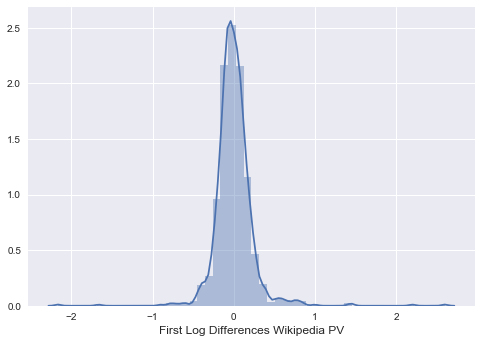

In [58]:
sns.distplot(wikipedia_pageviews_series_diff_log)
plt.xlabel('First Log Differences Wikipedia PV', fontsize='medium')
plt.show()

# 3. Bitcoin WAP

In [59]:
bitcoin_weekly_price = pd.DataFrame.from_csv("Bitcoin Weekly Price Data.csv")
bitcoin_weekly_price_series = pd.Series(data=bitcoin_weekly_price["Weekly Average Price"])
bitcoin_weekly_price_series.head()

0     96.677143
1    133.834286
2    121.818571
3    113.905714
4    113.572857
Name: Weekly Average Price, dtype: float64

## 3.1 Non-transformed data

### A) Stationarity

ADF:

In [60]:
I = bitcoin_weekly_price_series.values
result = adfuller(I)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.060935
p-value: 1.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


KPSS:

In [61]:
result = kpss(I)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.758160
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [62]:
stats.skew(bitcoin_weekly_price_series)

2.916699248043092

Kurtosis:

In [63]:
stats.kurtosis(bitcoin_weekly_price_series)

8.29248952703325

Mean:

In [64]:
np.mean(bitcoin_weekly_price_series)

1671.4525013683635

Histogram:

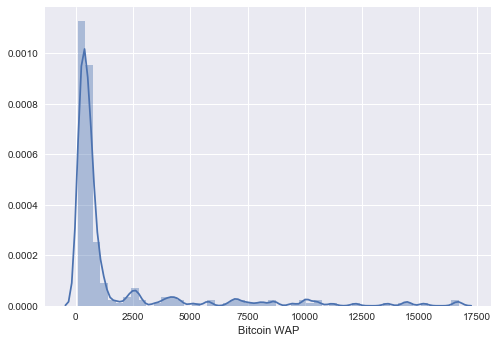

In [65]:
sns.distplot(bitcoin_weekly_price_series)
plt.xlabel('Bitcoin WAP')
plt.show()

## 3.2 Logarithmic Transformation

In [66]:
bitcoin_weekly_price_series_log = bitcoin_weekly_price_series.apply(np.log)

### A) Stationarity

ADF:

In [67]:
J = bitcoin_weekly_price_series_log.values
result = adfuller(J)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.261818
p-value: 0.930741
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


KPSS:

In [68]:
result = kpss(J)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 1.113494
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [69]:
stats.skew(bitcoin_weekly_price_series_log)

0.8858966210168651

Kurtosis:

In [70]:
stats.kurtosis(bitcoin_weekly_price_series_log)

0.28281635548873485

Mean:

In [71]:
np.mean(bitcoin_weekly_price_series_log)

6.459861874752628

Histogram:

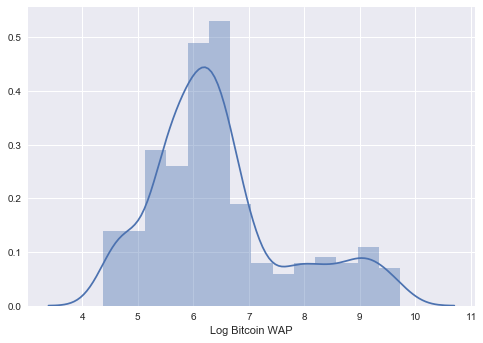

In [72]:
sns.distplot(bitcoin_weekly_price_series_log)
plt.xlabel('Log Bitcoin WAP')
plt.show()

## 3.3 First Differences

In [73]:
bitcoin_weekly_price_series_diff = bitcoin_weekly_price_series.diff()
bitcoin_weekly_price_series_diff = bitcoin_weekly_price_series_diff.drop(0)

### A) Stationarity

ADF:

In [74]:
K = bitcoin_weekly_price_series_diff.values
result = adfuller(K)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.913411
p-value: 0.043811
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573


KPSS:

In [75]:
result = kpss(K)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.108294
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [76]:
stats.skew(bitcoin_weekly_price_series_diff)

1.7039125315800987

Kurtosis:

In [77]:
stats.kurtosis(bitcoin_weekly_price_series_diff)

25.038489176453865

Mean:

In [78]:
np.mean(bitcoin_weekly_price_series_diff)

27.872714285714277

Histogram:

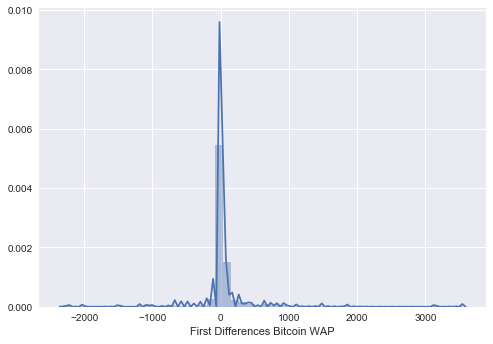

In [79]:
sns.distplot(bitcoin_weekly_price_series_diff)
plt.xlabel('First Differences Bitcoin WAP')
plt.show()

## 3.4 First log differences

In [80]:
bitcoin_weekly_price_series_diff_log = bitcoin_weekly_price_series_log.diff()
bitcoin_weekly_price_series_diff_log = bitcoin_weekly_price_series_diff_log.drop(0)

### A) Stationarity

ADF:

In [81]:
L = bitcoin_weekly_price_series_diff_log.values
result = adfuller(L)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.982427
p-value: 0.000000
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


KPSS:

In [82]:
result = kpss(L)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.116054
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [83]:
stats.skew(bitcoin_weekly_price_series_diff_log)

-0.05582351845435937

Kurtosis:

In [84]:
stats.kurtosis(bitcoin_weekly_price_series_diff_log)

8.330313671459532

Mean:

In [85]:
np.mean(bitcoin_weekly_price_series_diff_log)

0.01665463510524836

Histogram:

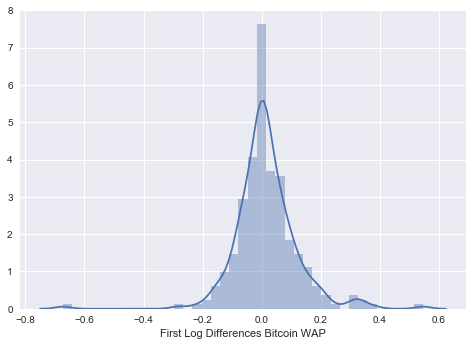

In [86]:
sns.distplot(bitcoin_weekly_price_series_diff_log)
plt.xlabel('First Log Differences Bitcoin WAP')
plt.show()

# 4. Bitcoin DP

In [87]:
bitcoin_daily_price = pd.DataFrame.from_csv("Bitcoin Daily Price Data.csv")
bitcoin_daily_price_series = pd.Series(data=bitcoin_daily_price["Daily Closing Price"])
bitcoin_daily_price_series.head()

0    257.62
1    254.54
2    255.92
3    260.20
4    271.50
Name: Daily Closing Price, dtype: float64

## 4.1 Non-transformed data

### A) Stationarity

ADF:

In [88]:
M = bitcoin_daily_price_series.values
result = adfuller(M)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.430742
p-value: 0.567452
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


KPSS:

In [89]:
result = kpss(M)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 2.780522
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [90]:
stats.skew(bitcoin_daily_price_series)

1.994944600227155

Kurtosis:

In [91]:
stats.kurtosis(bitcoin_daily_price_series)

3.3281235355826952

Mean:

In [92]:
np.mean(bitcoin_daily_price_series)

2703.39605495584

Histogram:

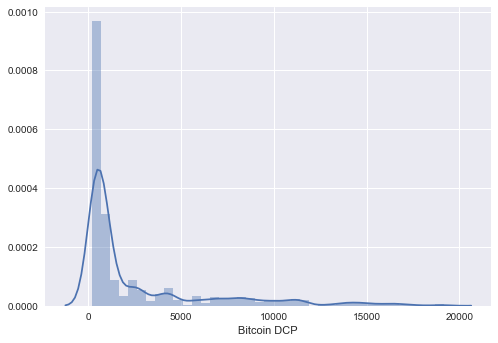

In [93]:
sns.distplot(bitcoin_daily_price_series)
plt.xlabel('Bitcoin DCP')
plt.show()

## 4.2 Logarithmic Transformation

In [94]:
bitcoin_daily_price_series_log = bitcoin_daily_price_series.apply(np.log)

### A) Stationarity

ADF:

In [95]:
N = bitcoin_daily_price_series_log.values
result = adfuller(N)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.074572
p-value: 0.951913
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


KPSS:

In [96]:
result = kpss(N)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 4.174235
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [97]:
stats.skew(bitcoin_daily_price_series_log)

0.6521776501256622

Kurtosis:

In [98]:
stats.kurtosis(bitcoin_daily_price_series_log)

-0.8491353851785348

Mean:

In [99]:
np.mean(bitcoin_daily_price_series_log)

7.061580595869992

Histogram:

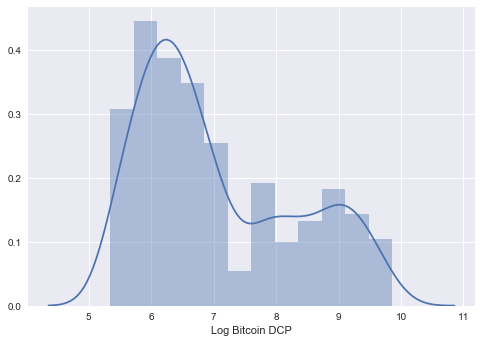

In [100]:
sns.distplot(bitcoin_daily_price_series_log)
plt.xlabel('Log Bitcoin DCP')
plt.show()

## 4.3 First Differences

In [101]:
bitcoin_daily_price_series_diff = bitcoin_daily_price_series.diff()
bitcoin_daily_price_series_diff = bitcoin_daily_price_series_diff.drop(0)

### A) Stationarity

ADF:

In [102]:
O = bitcoin_daily_price_series_diff.values
result = adfuller(O)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.632201
p-value: 0.000001
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


KPSS:

In [103]:
result = kpss(O)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.081690
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [104]:
stats.skew(bitcoin_daily_price_series_diff)

0.836353352188406

Kurtosis:

In [105]:
stats.kurtosis(bitcoin_daily_price_series_diff)

24.936078267572054

Mean:

In [106]:
np.mean(bitcoin_daily_price_series_diff)

7.605884086444009

Histogram:

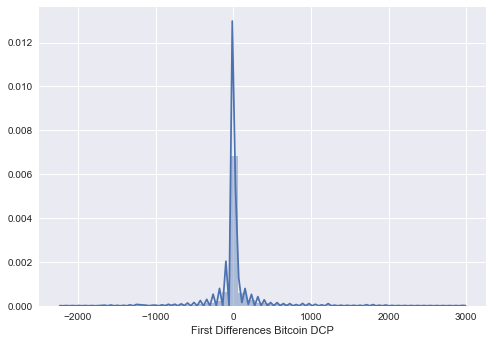

In [107]:
sns.distplot(bitcoin_daily_price_series_diff)
plt.xlabel('First Differences Bitcoin DCP')
plt.show()

## 4.4 First Logarithmic differences

In [108]:
bitcoin_daily_price_series_diff_log = bitcoin_daily_price_series_log.diff()
bitcoin_daily_price_series_diff_log = bitcoin_daily_price_series_diff_log.drop(0)

### A) Stationarity

ADF:

In [109]:
P = bitcoin_daily_price_series_diff_log.values
result = adfuller(P)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -31.793717
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


KPSS:

In [110]:
result = kpss(P)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.117385
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [111]:
stats.skew(bitcoin_daily_price_series_diff_log)

-0.16316545542371003

Kurtosis:

In [112]:
stats.kurtosis(bitcoin_daily_price_series_diff_log)

4.3703422309405076

Mean:

In [113]:
np.mean(bitcoin_daily_price_series_diff_log)

0.0033750122184487176

Histogram:

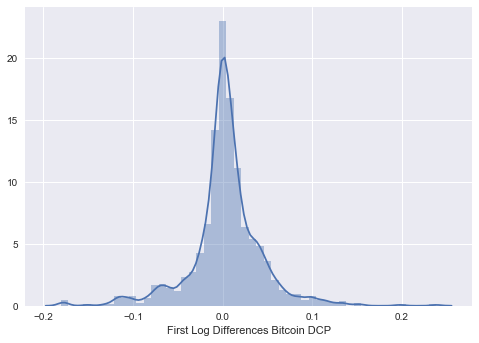

In [114]:
sns.distplot(bitcoin_daily_price_series_diff_log)
plt.xlabel('First Log Differences Bitcoin DCP')
plt.show()

# 5. Bitcoin WAV USD

In [115]:
bitcoin_weekly_volume = pd.DataFrame.from_csv("Bitcoin Weekly Volume Data USD.csv")
bitcoin_weekly_volume_series = pd.Series(data=bitcoin_weekly_volume["Average Volume per Week"])
bitcoin_weekly_volume_series.head()

0    1.815588e+06
1    1.770383e+06
2    1.770067e+06
3    1.154001e+06
4    8.223102e+05
Name: Average Volume per Week, dtype: float64

## 5.1 Non-transformed data

### A) Stationarity

ADF:

In [116]:
Q = bitcoin_weekly_volume_series.values
result = adfuller(Q)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.721505
p-value: 0.070390
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


KPSS:

In [117]:
result = kpss(Q)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.655889
p-value: 0.017556
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


### B) Distribution

Skewness:

In [118]:
stats.skew(bitcoin_weekly_volume_series)

3.497635119870579

Kurtosis:

In [119]:
stats.kurtosis(bitcoin_weekly_volume_series)

14.050551272592102

Mean:

In [120]:
np.mean(bitcoin_weekly_volume_series)

24611510.508370228

Histogram:

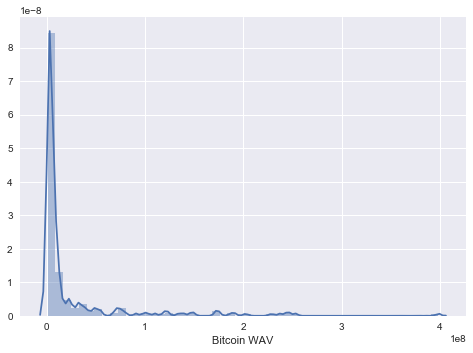

In [121]:
sns.distplot(bitcoin_weekly_volume_series)
plt.xlabel('Bitcoin WAV')
plt.show()

## 5.2 Logarithmic Transformation

In [122]:
bitcoin_weekly_volume_series_log = bitcoin_weekly_volume_series.apply(np.log)

### A) Stationarity

ADF:

In [123]:
R = bitcoin_weekly_volume_series_log.values
result = adfuller(R)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.686325
p-value: 0.438172
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


KPSS:

In [124]:
result = kpss(R)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.760382
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [125]:
stats.skew(bitcoin_weekly_volume_series_log)

0.8935335406134945

Kurtosis:

In [126]:
stats.kurtosis(bitcoin_weekly_volume_series_log)

0.003968829930680595

Mean:

In [127]:
np.mean(bitcoin_weekly_volume_series_log)

15.712206092040503

Histogram:

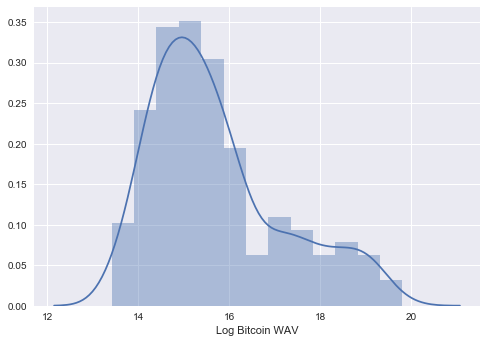

In [128]:
sns.distplot(bitcoin_weekly_volume_series_log)
plt.xlabel('Log Bitcoin WAV')
plt.show()

## 5.3 First Differences

In [129]:
bitcoin_weekly_volume_series_diff = bitcoin_weekly_volume_series.diff()
bitcoin_weekly_volume_series_diff = bitcoin_weekly_volume_series_diff.drop(0)

### A) Stationarity

ADF:

In [130]:
S = bitcoin_weekly_volume_series_diff.values
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.516963
p-value: 0.000183
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


KPSS:

In [131]:
result = kpss(S)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.052556
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### B) Distribution

Histogram:

Skewness:

In [132]:
stats.skew(bitcoin_weekly_volume_series_diff)

-0.9932700691881267

Kurtosis:

In [133]:
stats.kurtosis(bitcoin_weekly_volume_series_diff)

26.538867041081343

Mean:

In [134]:
np.mean(bitcoin_weekly_volume_series_diff)

298807.6402464423

Histogram:

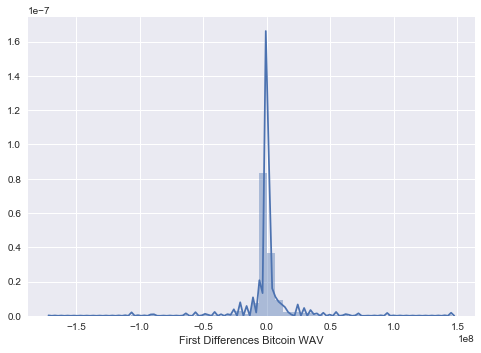

In [135]:
sns.distplot(bitcoin_weekly_volume_series_diff)
plt.xlabel('First Differences Bitcoin WAV')
plt.show()

## 5.4 First log differences

In [136]:
bitcoin_weekly_volume_series_diff_log = bitcoin_weekly_volume_series_log.diff()
bitcoin_weekly_volume_series_diff_log = bitcoin_weekly_volume_series_diff_log.drop(0)

### A) Stationarity

ADF:

In [137]:
T = bitcoin_weekly_volume_series_diff_log.values
result = adfuller(T)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.316044
p-value: 0.000000
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


KPSS:

In [138]:
result = kpss(T)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.088209
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [139]:
stats.skew(bitcoin_weekly_volume_series_diff_log)

0.3006050802231071

Kurtosis:

In [140]:
stats.kurtosis(bitcoin_weekly_volume_series_diff_log)

0.17657360263736877

Mean:

In [141]:
np.mean(bitcoin_weekly_volume_series_diff_log)

0.014536221717575692

Histogram:

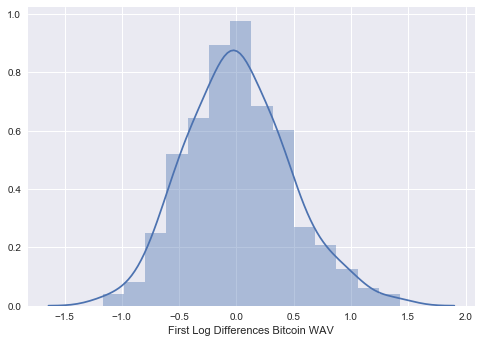

In [142]:
sns.distplot(bitcoin_weekly_volume_series_diff_log)
plt.xlabel('First Log Differences Bitcoin WAV')
plt.show()

# 6. Bitcoin DV USD

In [143]:
bitcoin_daily_volume = pd.DataFrame.from_csv("Bitcoin Daily Volume Data USD.csv")
bitcoin_daily_volume_series = pd.Series(data=bitcoin_daily_volume["Volume (Currency)"])
bitcoin_daily_volume_series.head()

0    3.453026e+06
1    2.515779e+06
2    2.331332e+06
3    2.037201e+06
4    5.689203e+06
Name: Volume (Currency), dtype: float64

## 6.1 Non-transformed data

### A) Stationarity

ADF:

In [144]:
U = bitcoin_daily_volume_series.values
result = adfuller(U)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.651628
p-value: 0.456192
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


KPSS:

In [145]:
result = kpss(U)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 2.481954
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [146]:
stats.skew(bitcoin_daily_volume_series)

3.4018551855168027

Kurtosis:

In [147]:
stats.kurtosis(bitcoin_daily_volume_series)

16.941605135054058

Mean:

In [148]:
np.mean(bitcoin_daily_volume_series)

39578451.36339238

Histogram:

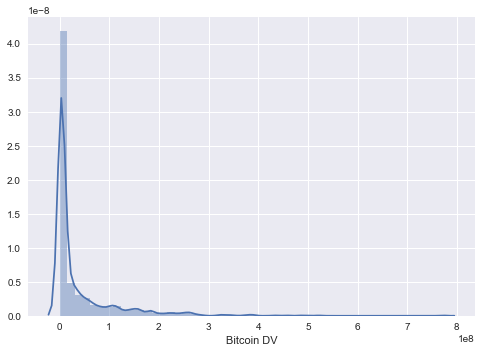

In [149]:
sns.distplot(bitcoin_daily_volume_series)
plt.xlabel('Bitcoin DV')
plt.show()

## 6.2 Logarithmic Transformation

In [150]:
bitcoin_daily_volume_series_log = bitcoin_daily_volume_series.apply(np.log)

### A) Stationarity

ADF:

In [151]:
V = bitcoin_daily_volume_series_log.values
result = adfuller(V)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.041212
p-value: 0.737938
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


KPSS:

In [152]:
result = kpss(V)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 3.436905
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [153]:
stats.skew(bitcoin_daily_volume_series_log)

0.5111655126101834

Kurtosis:

In [154]:
stats.kurtosis(bitcoin_daily_volume_series_log)

-0.9038933274133258

Mean:

In [155]:
np.mean(bitcoin_daily_volume_series_log)

16.119801834590792

Histogram:

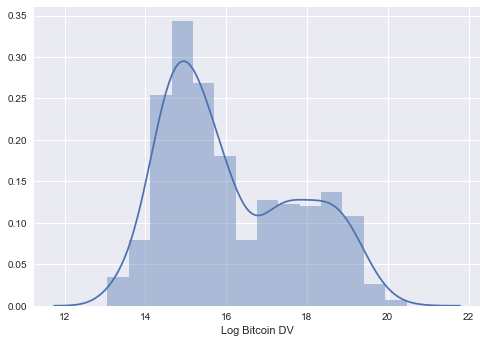

In [156]:
sns.distplot(bitcoin_daily_volume_series_log)
plt.xlabel('Log Bitcoin DV')
plt.show()

## 6.3 First Differences

In [157]:
bitcoin_daily_volume_series_diff = bitcoin_daily_volume_series.diff()
bitcoin_daily_volume_series_diff = bitcoin_daily_volume_series_diff.drop(0)

### A) Stationarity

ADF:

In [158]:
W = bitcoin_daily_volume_series_diff.values
result = adfuller(W)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.684338
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


KPSS:

In [159]:
result = kpss(W)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.026778
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [160]:
stats.skew(bitcoin_daily_volume_series_diff)

0.31675031607706833

Kurtosis:

In [161]:
stats.kurtosis(bitcoin_daily_volume_series_diff)

46.60371409741665

Mean:

In [162]:
np.mean(bitcoin_daily_volume_series_diff)

67021.72298761993

Histogram:

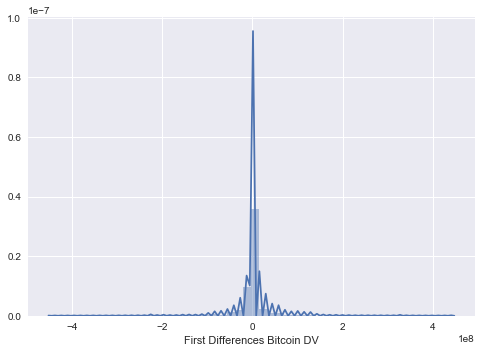

In [163]:
sns.distplot(bitcoin_daily_volume_series_diff)
plt.xlabel('First Differences Bitcoin DV')
plt.show()

## 6.4 First log differences

In [164]:
bitcoin_daily_volume_series_diff_log = bitcoin_daily_volume_series_log.diff()
bitcoin_daily_volume_series_diff_log = bitcoin_daily_volume_series_diff_log.drop(0)

### A) Stationarity

ADF:

In [165]:
X = bitcoin_daily_volume_series_diff_log.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.191199
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


KPSS:

In [166]:
result = kpss(X)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.042571
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [167]:
stats.skew(bitcoin_daily_volume_series_diff_log)

0.3116097539452415

Kurtosis:

In [168]:
stats.kurtosis(bitcoin_daily_volume_series_diff_log)

0.6993506737735209

Mean:

In [169]:
np.mean(bitcoin_daily_volume_series_diff_log)

0.002979348490027913

Histogram:

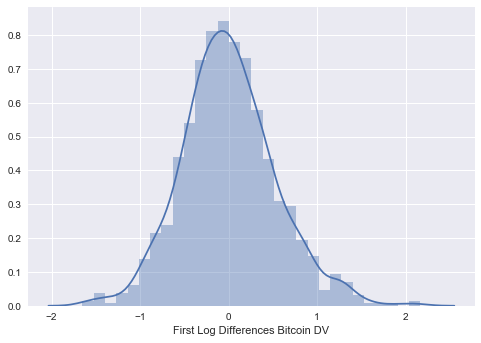

In [170]:
sns.distplot(bitcoin_daily_volume_series_diff_log)
plt.xlabel('First Log Differences Bitcoin DV')
plt.show()

# 7. Bitcoin WAV BTC

In [171]:
bitcoin_weekly_volume = pd.DataFrame.from_csv("Bitcoin Weekly Volume Data BTC.csv")
bitcoin_weekly_volume_series = pd.Series(data=bitcoin_weekly_volume["Average Volume per Week (BTC)"])
bitcoin_weekly_volume_series.head()

0    20202.562639
1    13204.207000
2    15670.144724
3    10198.091312
4     7279.517695
Name: Average Volume per Week (BTC), dtype: float64

## 7.1 Non-transformed data

### A) Stationarity

ADF:

In [172]:
Y = bitcoin_weekly_volume_series.values
result = adfuller(Y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.469291
p-value: 0.000002
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


KPSS:

In [173]:
result = kpss(Y)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.233755
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [174]:
stats.skew(bitcoin_weekly_volume_series)

1.9292522789147692

Kurtosis:

In [175]:
stats.kurtosis(bitcoin_weekly_volume_series)

5.0942192903625365

Mean:

In [176]:
np.mean(bitcoin_weekly_volume_series)

12781.699863334416

Histogram:

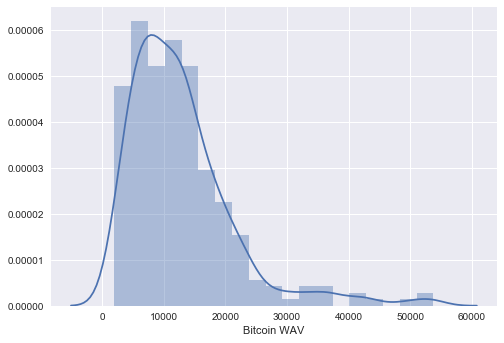

In [177]:
sns.distplot(bitcoin_weekly_volume_series)
plt.xlabel('Bitcoin WAV')
plt.show()

## 7.2 Logarithmic Transformation

In [178]:
bitcoin_weekly_volume_series_log = bitcoin_weekly_volume_series.apply(np.log)

### A) Stationarity

ADF:

In [179]:
R = bitcoin_weekly_volume_series_log.values
result = adfuller(R)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.517062
p-value: 0.111378
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


KPSS:

In [180]:
result = kpss(R)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.240076
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [181]:
stats.skew(bitcoin_weekly_volume_series_log)

-0.1081232978581305

Kurtosis:

In [182]:
stats.kurtosis(bitcoin_weekly_volume_series_log)

-0.13551504112719615

Mean:

In [183]:
np.mean(bitcoin_weekly_volume_series_log)

9.257231187906775

Histogram:

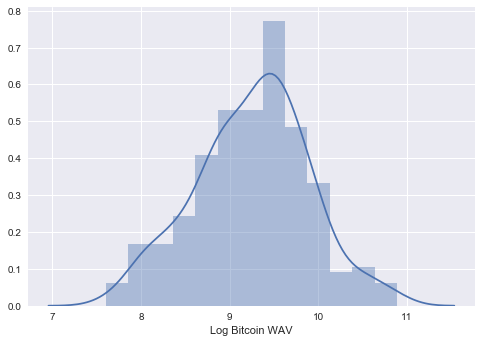

In [184]:
sns.distplot(bitcoin_weekly_volume_series_log)
plt.xlabel('Log Bitcoin WAV')
plt.show()

## 7.3 First Differences

In [185]:
bitcoin_weekly_volume_series_diff = bitcoin_weekly_volume_series.diff()
bitcoin_weekly_volume_series_diff = bitcoin_weekly_volume_series_diff.drop(0)

### A) Stationarity

ADF:

In [186]:
S = bitcoin_weekly_volume_series_diff.values
result = adfuller(S)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.072689
p-value: 0.000000
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


KPSS:

In [187]:
result = kpss(S)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.037708
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### B) Distribution

Histogram:

Skewness:

In [188]:
stats.skew(bitcoin_weekly_volume_series_diff)

0.029306750721746114

Kurtosis:

In [189]:
stats.kurtosis(bitcoin_weekly_volume_series_diff)

5.412113902888075

Mean:

In [190]:
np.mean(bitcoin_weekly_volume_series_diff)

-36.85761928913729

Histogram:

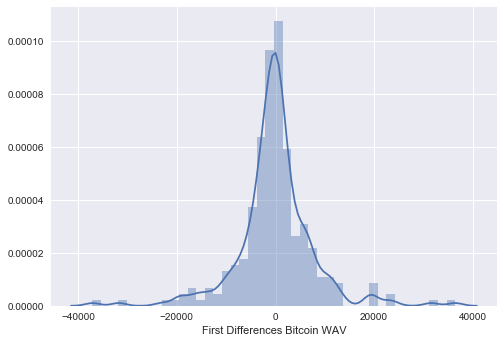

In [191]:
sns.distplot(bitcoin_weekly_volume_series_diff)
plt.xlabel('First Differences Bitcoin WAV')
plt.show()

## 7.4 First log differences

In [192]:
bitcoin_weekly_volume_series_diff_log = bitcoin_weekly_volume_series_log.diff()
bitcoin_weekly_volume_series_diff_log = bitcoin_weekly_volume_series_diff_log.drop(0)

### A) Stationarity

ADF:

In [193]:
T = bitcoin_weekly_volume_series_diff_log.values
result = adfuller(T)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.073261
p-value: 0.000000
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


KPSS:

In [194]:
result = kpss(T)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.052152
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [195]:
stats.skew(bitcoin_weekly_volume_series_diff_log)

0.270932413640471

Kurtosis:

In [196]:
stats.kurtosis(bitcoin_weekly_volume_series_diff_log)

0.2933565083969354

Mean:

In [197]:
np.mean(bitcoin_weekly_volume_series_diff_log)

-0.0024734993836652633

Histogram:

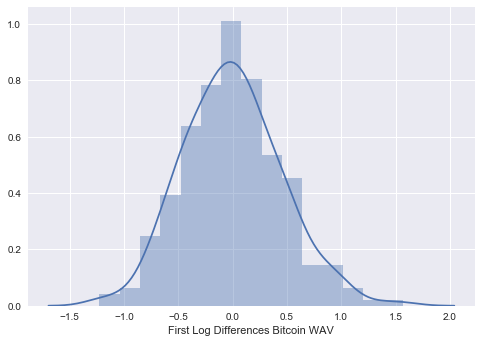

In [198]:
sns.distplot(bitcoin_weekly_volume_series_diff_log)
plt.xlabel('First Log Differences Bitcoin WAV')
plt.show()

# 8. Bitcoin DV BTC

In [199]:
bitcoin_daily_volume = pd.DataFrame.from_csv("Bitcoin Daily Volume Data BTC.csv")
bitcoin_daily_volume_series = pd.Series(data=bitcoin_daily_volume["Volume (BTC)"])
bitcoin_daily_volume_series.head()

0    13395.153439
1     9826.994781
2     9153.852565
3     7909.856729
4    21362.613650
Name: Volume (BTC), dtype: float64

## 8.1 Non-transformed data

### A) Stationarity

ADF:

In [200]:
U = bitcoin_daily_volume_series.values
result = adfuller(U)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.297546
p-value: 0.014989
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


KPSS:

In [201]:
result = kpss(U)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.647455
p-value: 0.018322
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


### B) Distribution

Skewness:

In [202]:
stats.skew(bitcoin_daily_volume_series)

2.7049126290389824

Kurtosis:

In [203]:
stats.kurtosis(bitcoin_daily_volume_series)

14.847911698775984

Mean:

In [204]:
np.mean(bitcoin_daily_volume_series)

11567.950253764766

Histogram:

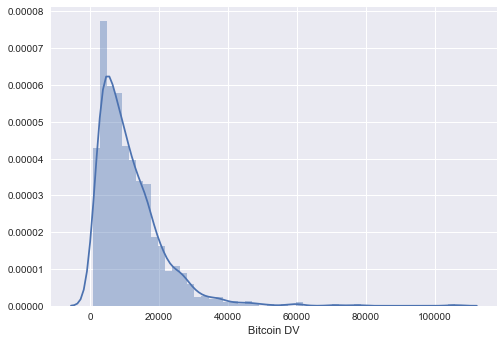

In [205]:
sns.distplot(bitcoin_daily_volume_series)
plt.xlabel('Bitcoin DV')
plt.show()

## 8.2 Logarithmic Transformation

In [206]:
bitcoin_daily_volume_series_log = bitcoin_daily_volume_series.apply(np.log)

### A) Stationarity

ADF:

In [207]:
V = bitcoin_daily_volume_series_log.values
result = adfuller(V)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.684865
p-value: 0.076694
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


KPSS:

In [208]:
result = kpss(V)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.949675
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [209]:
stats.skew(bitcoin_daily_volume_series_log)

-0.24642570279797976

Kurtosis:

In [210]:
stats.kurtosis(bitcoin_daily_volume_series_log)

-0.21538647454304094

Mean:

In [211]:
np.mean(bitcoin_daily_volume_series_log)

9.061317944186923

Histogram:

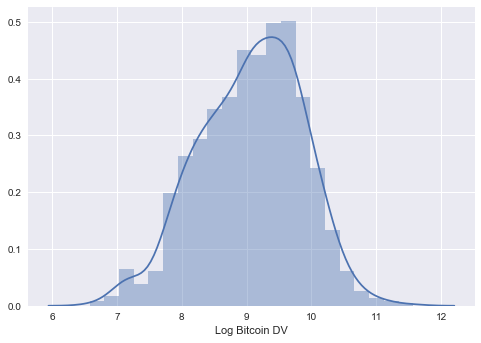

In [212]:
sns.distplot(bitcoin_daily_volume_series_log)
plt.xlabel('Log Bitcoin DV')
plt.show()

## 8.3 First Differences

In [213]:
bitcoin_daily_volume_series_diff = bitcoin_daily_volume_series.diff()
bitcoin_daily_volume_series_diff = bitcoin_daily_volume_series_diff.drop(0)

### A) Stationarity

ADF:

In [214]:
W = bitcoin_daily_volume_series_diff.values
result = adfuller(W)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.890657
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


KPSS:

In [215]:
result = kpss(W)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.016120
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [216]:
stats.skew(bitcoin_daily_volume_series_diff)

0.07392387392871784

Kurtosis:

In [217]:
stats.kurtosis(bitcoin_daily_volume_series_diff)

6.812546695752365

Mean:

In [218]:
np.mean(bitcoin_daily_volume_series_diff)

-4.38076888421416

Histogram:

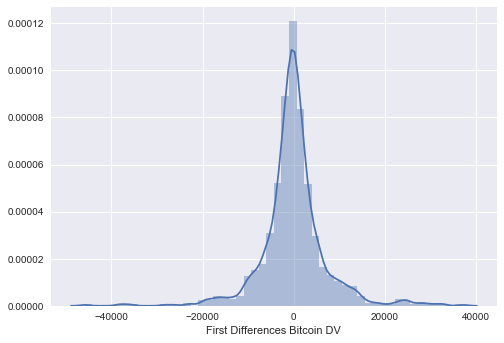

In [219]:
sns.distplot(bitcoin_daily_volume_series_diff)
plt.xlabel('First Differences Bitcoin DV')
plt.show()

## 8.4 First log differences

In [220]:
bitcoin_daily_volume_series_diff_log = bitcoin_daily_volume_series_log.diff()
bitcoin_daily_volume_series_diff_log = bitcoin_daily_volume_series_diff_log.drop(0)

### A) Stationarity

ADF:

In [221]:
X = bitcoin_daily_volume_series_diff_log.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.734086
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


KPSS:

In [222]:
result = kpss(X)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.024029
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [223]:
stats.skew(bitcoin_daily_volume_series_diff_log)

0.3310341286570682

Kurtosis:

In [224]:
stats.kurtosis(bitcoin_daily_volume_series_diff_log)

0.7841541108054026

Mean:

In [225]:
np.mean(bitcoin_daily_volume_series_diff_log)

-0.0003976988347089788

Histogram:

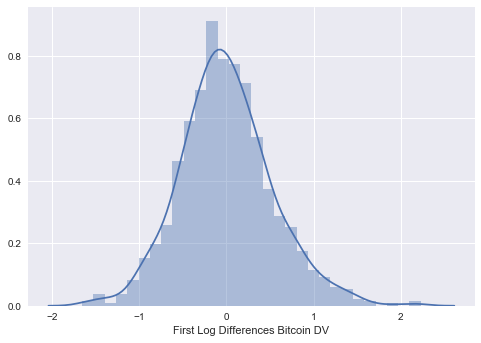

In [226]:
sns.distplot(bitcoin_daily_volume_series_diff_log)
plt.xlabel('First Log Differences Bitcoin DV')
plt.show()

# 9. Control Variable: Google SV Worldwide

In [227]:
google_queries_worldwide = pd.DataFrame.from_csv("Google Trends Relative Search Volume Worldwide.csv")

## 9.1 Non-transformed data

### A) Stationarity

In [228]:
google_queries_worldwide_series = pd.Series(data=google_queries_worldwide["Relative Search Volume Worldwide"])
google_queries_worldwide_series.head()

0    6
1    3
2    3
3    3
4    2
Name: Relative Search Volume Worldwide, dtype: int64

ADF:

In [229]:
Y = google_queries_worldwide_series.values
result = adfuller(Y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.584118
p-value: 0.096324
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


KPSS:

In [230]:
result = kpss(Y)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.636005
p-value: 0.019363
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


### B) Distribution

Skewness:

In [231]:
stats.skew(google_queries_worldwide_series)

4.118457662052381

Kurtosis:

In [232]:
stats.kurtosis(google_queries_worldwide_series)

19.7403242584028

Mean:

In [233]:
np.mean(google_queries_worldwide_series)

7.67816091954023

Histogram:

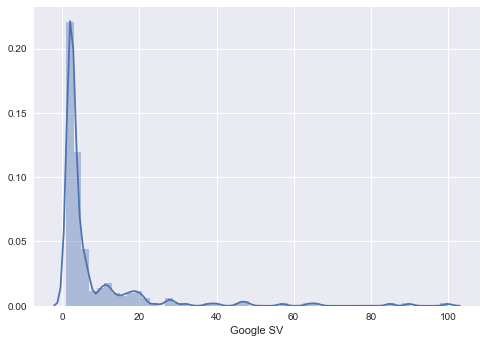

In [234]:
sns.distplot(google_queries_worldwide_series)
plt.xlabel('Google SV')
plt.show()

## 9.2 Log-Transformation

In [235]:
google_queries_worldwide_series_log = google_queries_worldwide_series.apply(np.log)

### A) Stationarity

ADF:

In [236]:
Y2 = google_queries_worldwide_series_log.values
result = adfuller(Y2)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.894067
p-value: 0.334858
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


KPSS:

In [237]:
result = kpss(Y2)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.835904
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [238]:
stats.skew(google_queries_worldwide_series_log)

1.2439061308695656

Kurtosis:

In [239]:
stats.kurtosis(google_queries_worldwide_series_log)

0.8920007969460935

Mean:

In [240]:
np.mean(google_queries_worldwide_series_log)

1.3914702846548768

Histogram:

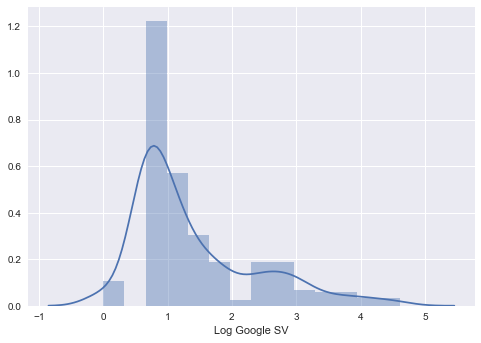

In [241]:
sns.distplot(google_queries_worldwide_series_log)
plt.xlabel('Log Google SV')
plt.show()

## 9.3 First Differences

In [242]:
google_queries_worldwide_series_diff = google_queries_worldwide_series.diff()
google_queries_worldwide_series_diff = google_queries_worldwide_series_diff.drop(0)

### A) Stationarity

ADF:

In [243]:
Y3 = google_queries_worldwide_series_diff.values
result = adfuller(Y3)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.177860
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


KPSS:

In [244]:
result = kpss(Y3)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.045686
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [245]:
stats.skew(google_queries_worldwide_series_diff)

0.34819290926527907

Kurtosis:

In [246]:
stats.kurtosis(google_queries_worldwide_series_diff)

37.44798142851854

Mean:

In [247]:
np.mean(google_queries_worldwide_series_diff)

0.038461538461538464

Histogram:

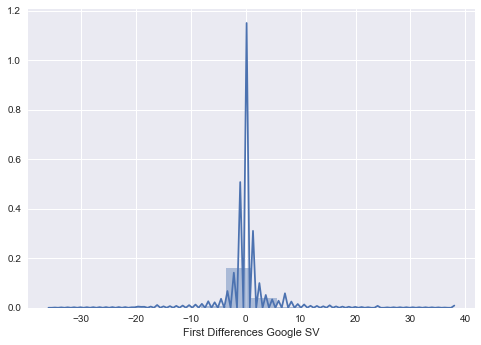

In [248]:
sns.distplot(google_queries_worldwide_series_diff)
plt.xlabel('First Differences Google SV')
plt.show()

## 9.4 First Log Differences

In [249]:
google_queries_worldwide_series_diff_log = google_queries_worldwide_series_log.diff()
google_queries_worldwide_series_diff_log = google_queries_worldwide_series_diff_log.drop(0)

### A) Stationarity

ADF:

In [250]:
Y4 = google_queries_worldwide_series_diff_log.values
result = adfuller(Y4)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.178366
p-value: 0.000000
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


KPSS:

In [251]:
result = kpss(Y4)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result [3].items():
    print('\t%s: %.3f' % (key,value))

KPSS Statistic: 0.138611
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### B) Distribution

Skewness:

In [252]:
stats.skew(google_queries_worldwide_series_diff_log)

0.4353319430783319

Kurtosis:

In [253]:
stats.kurtosis(google_queries_worldwide_series_diff_log)

2.150556014605689

Mean:

In [254]:
np.mean(google_queries_worldwide_series_diff_log)

0.0037724202038912544

Histogram:

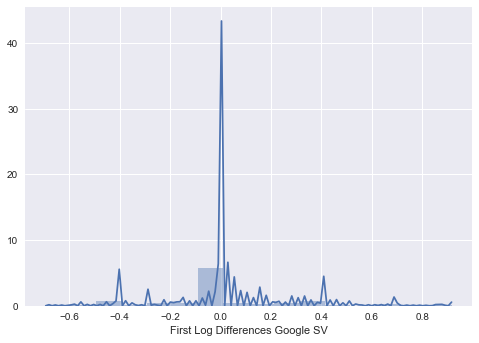

In [255]:
sns.distplot(google_queries_worldwide_series_diff_log)
plt.xlabel('First Log Differences Google SV')
plt.show()